### ***Import Statements***

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt
import seaborn as sns

### ***Loading Dataset***

In [2]:
df = pd.read_csv('cleaned maternal health dataset.csv')

In [5]:
print(df)

     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  \
0     25         130           80  15.0      98.0         86   
1     35         140           90  13.0      98.0         70   
2     29          90           70   8.0     100.0         80   
3     30         140           85   7.0      98.0         70   
4     35         120           60   6.1      98.0         76   
..   ...         ...          ...   ...       ...        ...   
447   12         100           50   6.4      98.0         70   
448   15         100           60   6.0      98.0         80   
449   15         100           49   7.6      98.0         77   
450   12         100           50   6.0      98.0         70   
451   21         100           50   6.8      98.0         60   

     RiskLevel_Encoded  
0                    1  
1                    1  
2                    1  
3                    1  
4                    3  
..                 ...  
447                  2  
448                  3  
449   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                452 non-null    int64  
 1   SystolicBP         452 non-null    int64  
 2   DiastolicBP        452 non-null    int64  
 3   BS                 452 non-null    float64
 4   BodyTemp           452 non-null    float64
 5   HeartRate          452 non-null    int64  
 6   RiskLevel_Encoded  452 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 24.8 KB


### ***Correlation Matrix***

<Axes: >

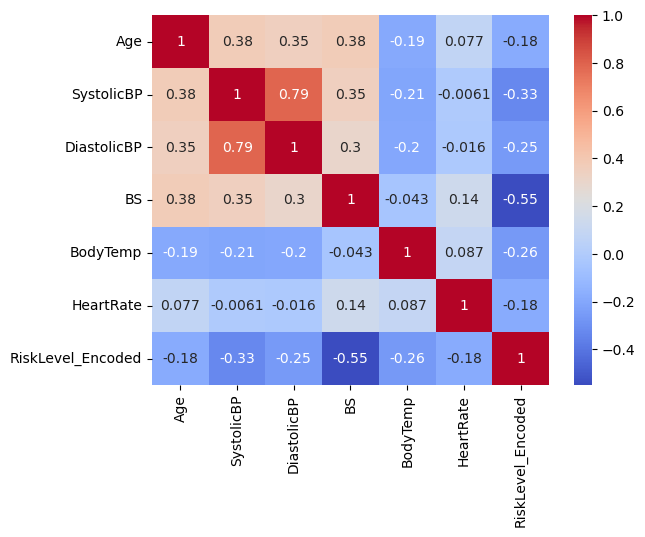

In [7]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

In [8]:
print(df.columns)
columns_to_drop = ['HeartRate']
df = df.drop(columns_to_drop, axis=1)
print(df.head(5))

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel_Encoded'],
      dtype='object')
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  RiskLevel_Encoded
0   25         130           80  15.0      98.0                  1
1   35         140           90  13.0      98.0                  1
2   29          90           70   8.0     100.0                  1
3   30         140           85   7.0      98.0                  1
4   35         120           60   6.1      98.0                  3


### ***Defining X and Y***

In [9]:
y = df['RiskLevel_Encoded']
x = df.drop('RiskLevel_Encoded', axis=1)

In [11]:
from sklearn.model_selection import train_test_split

### ***Data Splitting***

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.head())
print(y_train.head())

     Age  SystolicBP  DiastolicBP    BS  BodyTemp
411   22         100           65  12.0      98.0
108   30         140          100  15.0      98.0
231   22         120           60  15.0      98.0
422   25         140          100  15.0      98.6
118   35         140          100   7.5      98.0
411    1
108    1
231    1
422    1
118    1
Name: RiskLevel_Encoded, dtype: int64


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### ***Model Training***

In [15]:
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6102941176470589
Confusion Matrix:
 [[23  5  4]
 [ 6 14 19]
 [ 4 15 46]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.72      0.71        32
           2       0.41      0.36      0.38        39
           3       0.67      0.71      0.69        65

    accuracy                           0.61       136
   macro avg       0.59      0.60      0.59       136
weighted avg       0.60      0.61      0.60       136

